<a href="https://colab.research.google.com/github/SahilJain8/Kannada_ocr/blob/main/Kannada_ocr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget http://www.ee.surrey.ac.uk/CVSSP/demos/chars74k/KannadaHnd.tgz

--2023-03-28 06:49:27--  http://www.ee.surrey.ac.uk/CVSSP/demos/chars74k/KannadaHnd.tgz
Resolving www.ee.surrey.ac.uk (www.ee.surrey.ac.uk)... 131.227.80.48
Connecting to www.ee.surrey.ac.uk (www.ee.surrey.ac.uk)|131.227.80.48|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 131888968 (126M) [application/x-gzip]
Saving to: ‘KannadaHnd.tgz’

KannadaHnd.tgz      100%[===================>] 125.78M  14.6MB/s    in 10s     

2023-03-28 06:49:39 (12.4 MB/s) - ‘KannadaHnd.tgz’ saved [131888968/131888968]



In [2]:
!tar -xvf /content/KannadaHnd.tgz

Streaming output truncated to the last 5000 lines.
Kannada/Hnd/Trj/Sample348/img348_020.m
Kannada/Hnd/Trj/Sample348/img348_021.m
Kannada/Hnd/Trj/Sample348/img348_022.m
Kannada/Hnd/Trj/Sample348/img348_023.m
Kannada/Hnd/Trj/Sample348/img348_024.m
Kannada/Hnd/Trj/Sample348/img348_025.m
Kannada/Hnd/Trj/Sample349/
Kannada/Hnd/Trj/Sample349/img349_007.m
Kannada/Hnd/Trj/Sample349/img349_010.m
Kannada/Hnd/Trj/Sample349/img349_014.m
Kannada/Hnd/Trj/Sample349/img349_015.m
Kannada/Hnd/Trj/Sample349/img349_016.m
Kannada/Hnd/Trj/Sample349/img349_017.m
Kannada/Hnd/Trj/Sample349/img349_018.m
Kannada/Hnd/Trj/Sample349/img349_019.m
Kannada/Hnd/Trj/Sample349/img349_020.m
Kannada/Hnd/Trj/Sample349/img349_021.m
Kannada/Hnd/Trj/Sample349/img349_022.m
Kannada/Hnd/Trj/Sample349/img349_023.m
Kannada/Hnd/Trj/Sample349/img349_024.m
Kannada/Hnd/Trj/Sample349/img349_025.m
Kannada/Hnd/Trj/Sample350/
Kannada/Hnd/Trj/Sample350/img350_007.m
Kannada/Hnd/Trj/Sample350/img350_010.m
Kannada/Hnd/Trj/Sample350/img350_014.

### Make the test train validation dataset

In [3]:
import os
import shutil
import random


original_dataset_dir = '/content/Kannada/Hnd/Img'

base_dir = 'img_data'
os.mkdir(base_dir)

train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)
test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)
validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)

train_split = 0.7
test_split = 0.2
validation_split = 0.1


for folder_name in os.listdir(original_dataset_dir):
    folder_path = os.path.join(original_dataset_dir, folder_name)
    if os.path.isdir(folder_path):
        files = os.listdir(folder_path)
        random.shuffle(files)
        train_size = int(len(files) * train_split)
        test_size = int(len(files) * test_split)
        validation_size = int(len(files) * validation_split)
        train_files = files[:train_size]
        test_files = files[train_size:train_size+test_size]
        validation_files = files[train_size+test_size:train_size+test_size+validation_size]
        for filename in train_files:
            src = os.path.join(folder_path, filename)
            dst = os.path.join(train_dir, folder_name, filename)
            os.makedirs(os.path.join(train_dir, folder_name), exist_ok=True)
            shutil.copyfile(src, dst)
        for filename in test_files:
            src = os.path.join(folder_path, filename)
            dst = os.path.join(test_dir, folder_name, filename)
            os.makedirs(os.path.join(test_dir, folder_name), exist_ok=True)
            shutil.copyfile(src, dst)
        for filename in validation_files:
            src = os.path.join(folder_path, filename)
            dst = os.path.join(validation_dir, folder_name, filename)
            os.makedirs(os.path.join(validation_dir, folder_name), exist_ok=True)
            shutil.copyfile(src, dst)


Make the Model and the Dataset

In [4]:
from tensorflow.keras.preprocessing.image import  ImageDataGenerator
from tensorflow.keras import optimizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
import  tensorflow as tf
import  matplotlib.pyplot as plt

In [5]:
data_gen = ImageDataGenerator(rescale=1/255.,
                              rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    vertical_flip=True


)


train_dataset =data_gen.flow_from_directory(
    'img_data/train',

    seed=42,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

valid_dataset =data_gen.flow_from_directory(
 'img_data/validation',

    seed=42,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)


test_dataset =data_gen.flow_from_directory(
    'img_data/test',

    seed=42,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

Found 11169 images belonging to 657 classes.
Found 1314 images belonging to 657 classes.
Found 3285 images belonging to 657 classes.


(32, 224, 224, 3)


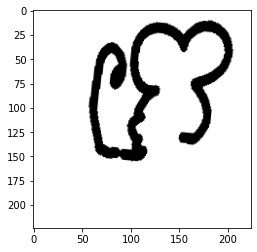

(32, 224, 224, 3)


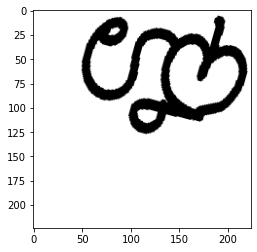

(32, 224, 224, 3)


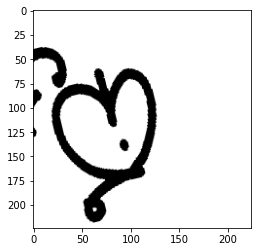

(32, 224, 224, 3)


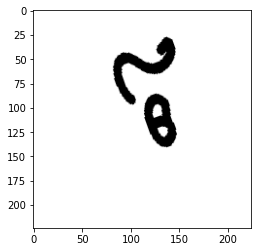

(32, 224, 224, 3)


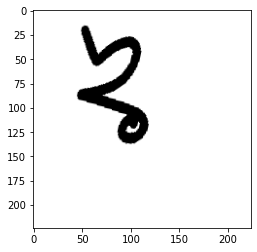

In [6]:
for _ in range(5):
    img, label = train_dataset.next()
    print(img.shape)   
    plt.imshow(img[0])
    plt.show()

In [ ]:
base_model = tf.keras.applications.MobileNet(input_shape=(224, 224, 3), include_top=False, weights='imagenet')
for layer in base_model.layers:
    layer.trainable = False
x = base_model.output
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dense(1024, activation='relu')(x)
x = tf.keras.layers.Dropout(0.5)(x)
predictions = tf.keras.layers.Dense(657, activation='softmax')(x)
model = tf.keras.models.Model(inputs=base_model.input, outputs=predictions)



model.compile(optimizer=tf.keras.optimizers.SGD(lr=1e-2), loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(train_dataset,  epochs=100, validation_data=valid_dataset,batch_size=100)

17225924/17225924 [==============================] - 2s 0us/step


Epoch 1/100
230/350 [==================>...........] - ETA: 1:21 - loss: 6.5956 - accuracy: 0.0016